Bagging

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

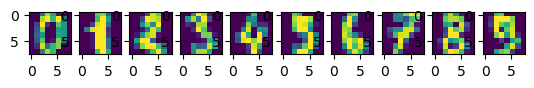

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

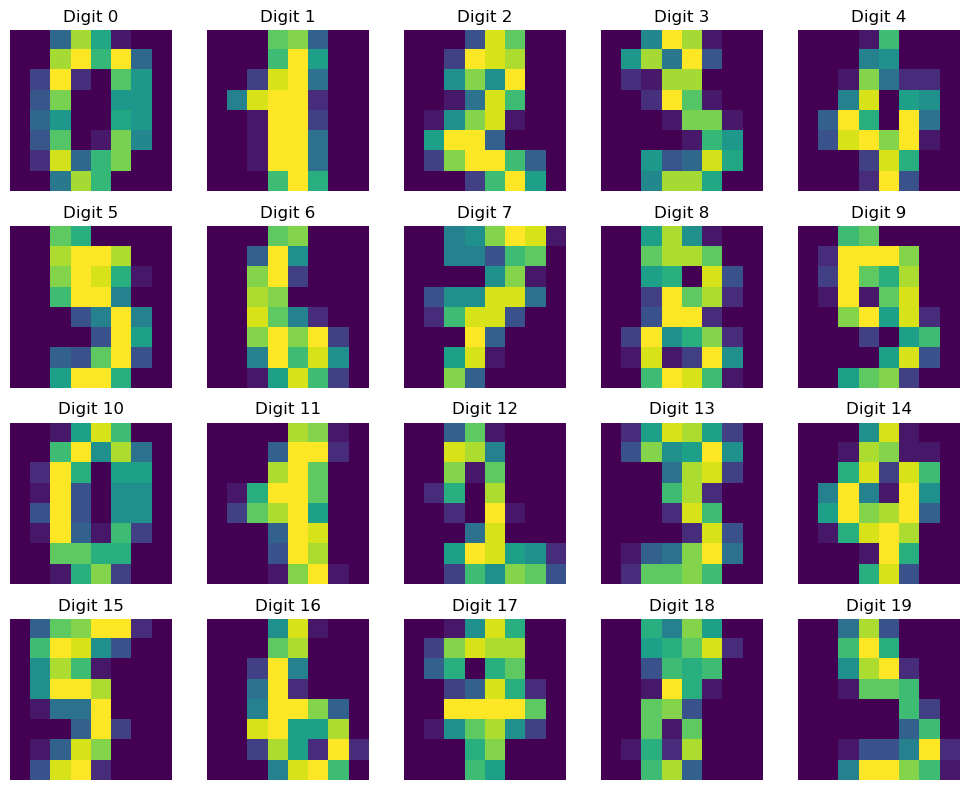

In [5]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Charger l'ensemble de données de chiffres manuscrits
digits = load_digits()

# Récupérer le nombre total d'images dans l'ensemble de données
num_images = len(digits.images)

# Définir le nombre de lignes et de colonnes pour afficher les images de manière organisée
num_rows = 4
num_cols = 5

# Afficher toutes les images de l'ensemble de données
plt.figure(figsize=(10, 8))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(digits.images[i])
    plt.title(f"Digit {i}")
    plt.axis('off')  # Désactiver les axes pour une meilleure présentation

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [7]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6909765142150803


In [8]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8444444444444444
0.8666666666666667
0.9
0.8666666666666667
0.8333333333333334
0.8666666666666667
0.9
0.8444444444444444
0.8666666666666667
0.8333333333333334
0.9
0.8666666666666667
0.8777777777777778
0.8777777777777778
0.9111111111111111
0.8444444444444444
0.8666666666666667
0.8777777777777778
0.8666666666666667
0.8333333333333334
0.8222222222222222
0.8888888888888888
0.8333333333333334
0.8555555555555555
0.8333333333333334
0.8666666666666667
0.8777777777777778
0.8555555555555555
0.8666666666666667
0.8444444444444444
0.8444444444444444
0.8666666666666667
0.8555555555555555
0.8222222222222222
0.8222222222222222
0.8777777777777778
0.7777777777777778
0.7444444444444445
0.8555555555555555
0.8444444444444444
0.8222222222222222
0.8666666666666667
0.8222222222222222
0.8444444444444444
0.9111111111111111
0.8222222222222222
0.8666666666666667
0.8777777777777778
0.9
0.9333333333333333
0.8444444444444444
0.9
0.8555555555555555
0.8333333333333334
0.8222222222222222
0.8111111111111111
0.877777777

In [9]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [10]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print (accuracy)

0.9777777777777777


In [11]:
N = 30
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    #print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.9740740740740741 0.015537908861780013


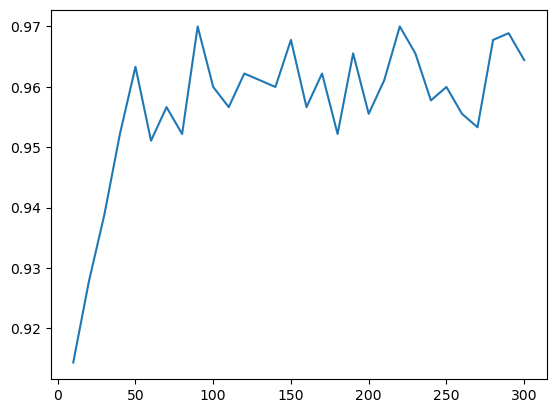

In [12]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [13]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9232480533926585
max_samples: 0.8
max_features: 0.6


RandomForest

In [14]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [16]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9171817058096415


In [17]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.7391841779975278
Bagging (200 arbres) : 0.9128553770086527
Forêt aléatoire (200 arbres) : 0.9177997527812114


In [18]:
N = 100

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.933837597330367 0.010575466662249774
0.9600667408231368 0.006881284906883888


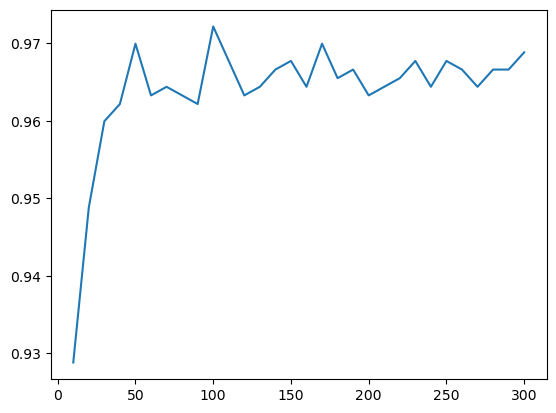

In [19]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    #print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

extra-trees

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9688542825361512
Extra Trees : 0.9755283648498332


Boosting

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_digits


digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
base_estimator = DecisionTreeClassifier(max_depth=5)
clf =AdaBoostClassifier(base_estimator=base_estimator, n_estimators=200, learning_rate=2)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
base_estimator = DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(n_estimators=200, learning_rate=2)

# Utiliser la méthode set_params pour spécifier l'estimateur de base
clf.set_params(base_estimator=base_estimator)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)


ValueError: Invalid parameter 'base_estimator' for estimator AdaBoostClassifier(learning_rate=2, n_estimators=200). Valid parameters are: ['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Créer un classificateur d'arbre de décision avec une profondeur maximale de 5
base_estimator = DecisionTreeClassifier(max_depth=5)

# Initialiser AdaBoost sans spécifier base_estimator
clf = AdaBoostClassifier(n_estimators=200, learning_rate=2,algorithm='SAMME')

# Spécifier l'estimateur de base après la création de l'instance
clf.base_estimator_ = base_estimator

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Précision :", accuracy)


Précision : 0.8071693448702101


In [34]:
pip install --upgrade pandas

  Using cached pandas-2.2.0-cp310-cp310-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.0-cp310-cp310-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade bottleneck

     ---------------------------------------- 0.0/109.9 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/109.9 kB 1.4 MB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.9 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 109.9/109.9 kB 797.1 kB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_digits

# Charger les données
digits = load_digits()
X, y = digits.data, digits.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

# Paramètres à tester
max_depth_values = [None, 5, 10]  # None signifie pas de limite de profondeur
learning_rate_values = [0.1, 1, 2]
n_estimators_values = [50, 100, 200]

# Initialiser un DataFrame pour stocker les résultats
#results = pd.DataFrame(columns=['Max Depth', 'Learning Rate', 'n_estimators', 'Accuracy'])# Initialiser une liste pour stocker les résultats
results_list = []
# Boucle sur les valeurs des paramètres et entraîner les modèles
for max_depth in max_depth_values:
    for learning_rate in learning_rate_values:
        for n_estimators in n_estimators_values:
            # Créer le classifieur AdaBoost
            base_estimator = DecisionTreeClassifier(max_depth=max_depth)
            # Initialiser AdaBoost sans spécifier base_estimator
            clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm='SAMME')
            # Spécifier l'estimateur de base après la création de l'instance
            clf.base_estimator_ = base_estimator

            # Entraîner le modèle
            clf.fit(X_train, y_train)
            
            # Calculer la précision
            accuracy = clf.score(X_test, y_test)
            
            # Enregistrer les résultats
            #results = results.append({'Max Depth': max_depth, 'Learning Rate': learning_rate, 'n_estimators': n_estimators, 'Accuracy': accuracy}, ignore_index=True)

            # Afficher les résultats# Enregistrer les résultats dans la liste
            results_list.append({'Max Depth': max_depth, 'Learning Rate': learning_rate, 'n_estimators': n_estimators, 'Accuracy': accuracy})

# Créer un DataFrame à partir de la liste de résultats
results = pd.DataFrame(results_list)

# Afficher les résultats
print(results)

    Max Depth  Learning Rate  n_estimators  Accuracy
0         NaN            0.1            50  0.210754
1         NaN            0.1           100  0.297899
2         NaN            0.1           200  0.245365
3         NaN            1.0            50  0.674289
4         NaN            1.0           100  0.671199
5         NaN            1.0           200  0.734858
6         NaN            2.0            50  0.703337
7         NaN            2.0           100  0.733622
8         NaN            2.0           200  0.794808
9         5.0            0.1            50  0.210754
10        5.0            0.1           100  0.297899
11        5.0            0.1           200  0.245365
12        5.0            1.0            50  0.674289
13        5.0            1.0           100  0.671199
14        5.0            1.0           200  0.734858
15        5.0            2.0            50  0.703337
16        5.0            2.0           100  0.733622
17        5.0            2.0           200  0.

graphique comprehensible

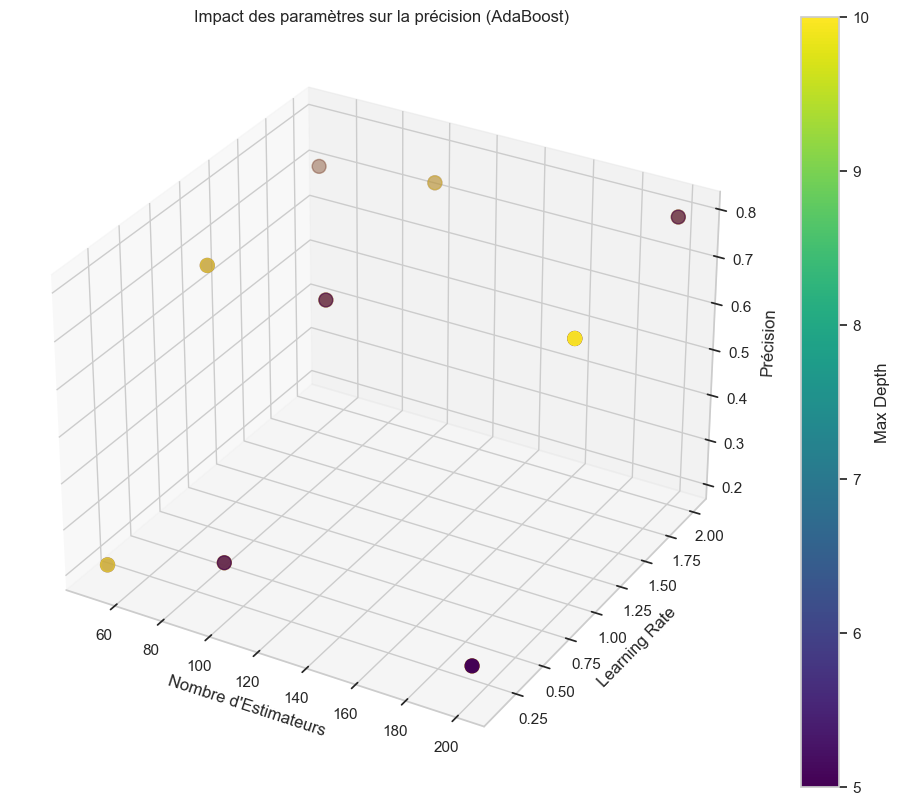

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Plotting en 3D
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracer le nuage de points
scatter = ax.scatter(results['n_estimators'], results['Learning Rate'], results['Accuracy'], c=results['Max Depth'], cmap='viridis', s=100)

# Ajouter une barre de couleur
cbar = plt.colorbar(scatter, ax=ax, label='Max Depth')

# Définir les étiquettes
ax.set_xlabel('Nombre d\'Estimateurs')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Précision')

plt.title('Impact des paramètres sur la précision (AdaBoost)')
plt.show()